<a href="https://colab.research.google.com/github/jpcaico/PyTorch-Fun/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # starts with input layer then moves forward through the layers until the output
 # input - forward - forward - forward - output


In [2]:
import torch
import torch.nn as nn # neural network
import torch.nn.functional as F

In [6]:
# Create a Model class the inherits the nn.Module

class Model(nn.Module):
  # Input layer (4 features of the flower) -->
  # Hidden Layer1 (number of neurons in it) -->
  #Hidden Layer2 (n) -->
  # output(3 classes of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=8, out_features=3):
    super().__init__() ## instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1) #fc1 is the fully connected 1
    self.fc2 = nn.Linear(h1, h2) # connect 1 and 2nd hidden layer
    self.out = nn.Linear(h2, out_features) #2nd hidden layer to output

  # function that moves everything forward
  def forward(self, x):
    x = F.relu(self.fc1(x)) #rectified linear unit , output less than 0, use 0 or the value
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [7]:
# manual seed for randomization
torch.manual_seed(41)
# create an instance of model

model = Model()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [11]:
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [12]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

<ipython-input-12-89c40cd5bd02>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [13]:
# Train test split, Set X,y
X = my_df.drop('variety', axis=1)
y = my_df['variety']


In [14]:
X = X.values
y = y.values

In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [17]:
from sklearn.model_selection import train_test_split


In [19]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

In [22]:
# convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [23]:
# convert y labels to tensor long (64 bit integers)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [26]:
# set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose  Adam Optimizer, lr = learning rate (if error doesnt go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [28]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)>

In [29]:
# Train our model
# Epochs? (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted value vs the y_train value

  # keep track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss is: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss is: 1.1318365335464478
Epoch: 10 and loss is: 0.9658561944961548
Epoch: 20 and loss is: 0.678993821144104
Epoch: 30 and loss is: 0.4004894196987152
Epoch: 40 and loss is: 0.2250950187444687
Epoch: 50 and loss is: 0.12207333743572235
Epoch: 60 and loss is: 0.07481686770915985
Epoch: 70 and loss is: 0.05451279506087303
Epoch: 80 and loss is: 0.044374920427799225
Epoch: 90 and loss is: 0.03837944194674492


Text(0.5, 0, 'Epoch')

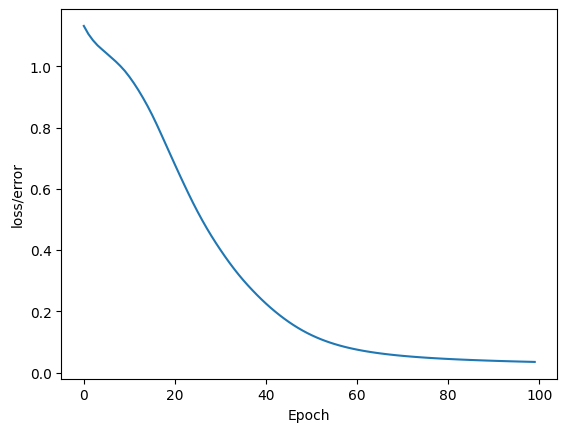

In [31]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")

In [32]:
# Evaluate on test dataset
with torch.no_grad(): #basically turn off back propagation ( we want to send it right through )
  y_eval = model.forward(X_test) #X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # find the loss or error



In [33]:
loss

tensor(0.1458)

In [39]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = 'Setosa'
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'

    # will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()} \t {x}')
    #1st col 0, 2nd col 1, 3rd col 2

    # correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f"We got {correct} correct")

1.) tensor([-7.7212,  1.5826,  4.8685]) 	 2 	 2 	 Virginica
2.) tensor([-10.2316,   0.5146,   8.7767]) 	 2 	 2 	 Virginica
3.) tensor([-10.7282,   1.1893,   8.2408]) 	 2 	 2 	 Virginica
4.) tensor([-4.4743,  3.5419, -1.1241]) 	 1 	 1 	 Versicolor
5.) tensor([-9.0954,  1.4687,  6.2899]) 	 2 	 2 	 Virginica
6.) tensor([-2.2803,  3.7077, -4.1196]) 	 1 	 1 	 Versicolor
7.) tensor([-7.0740,  2.2070,  3.2966]) 	 2 	 2 	 Virginica
8.) tensor([-4.2271,  3.6553, -1.5467]) 	 1 	 1 	 Versicolor
9.) tensor([-8.0707,  1.8280,  4.7897]) 	 2 	 2 	 Virginica
10.) tensor([-10.8583,   0.5051,   9.3761]) 	 2 	 2 	 Virginica
11.) tensor([-6.8676,  2.2165,  3.0859]) 	 2 	 2 	 Virginica
12.) tensor([  9.4382,   3.2638, -18.8717]) 	 0 	 0 	 Setosa
13.) tensor([  8.6037,   2.9307, -17.1502]) 	 0 	 0 	 Setosa
14.) tensor([-1.0594,  3.1702, -4.7116]) 	 1 	 1 	 Versicolor
15.) tensor([  8.0310,   3.2450, -16.7844]) 	 0 	 0 	 Setosa
16.) tensor([-6.7105,  2.4191,  2.6637]) 	 2 	 2 	 Virginica
17.) tensor([  8.467

In [40]:
# Evaluate new data on the network
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [41]:
with torch.no_grad():
  print(model(new_iris))

tensor([  9.2092,   3.0850, -18.2915])


In [42]:
#classified as a 0 (biggest number) = Setosa

In [43]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])


In [44]:
with torch.no_grad():
  print(model(newer_iris))

tensor([-7.8951,  1.5082,  5.1164])


In [45]:
# got a 2 = Virginica

In [46]:
# Save our NN model

torch.save(model.state_dict(), 'mlp_model_iris.pt') #save weights and biases into a dicitonary and to collab unit

In [47]:
new_model = Model()
new_model.load_state_dict(torch.load('mlp_model_iris.pt'))


<ipython-input-47-22ef96ba4848>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('mlp_model_iris.pt'))


<All keys matched successfully>

In [48]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (out): Linear(in_features=8, out_features=3, bias=True)
)